In [68]:
from sklearn.base import BaseEstimator
from sklearn import preprocessing
import numpy as np

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [69]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
    return df

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

정확도:0.7877


In [71]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1))
    
digits = load_digits()
print(digits.target)
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)


[0 1 2 ... 8 9 8]


In [72]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 ㄷㄷ:{0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 ㄷㄷ:0.900


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,  pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}\n'.format(accuracy, precision, recall, f1))

In [75]:
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도:0.8182, 재현율: 0.7377, f1: 0.7759



C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape :{0}'.format(pred_proba.shape))
print('pred_proba array 앞에서 3개만 추출:\n', pred_proba[:3])
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('\n두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:\n', pred_proba_result[:5])

pred_proba() 결과 shape :(179, 2)
pred_proba array 앞에서 3개만 추출:
 [[0.45394788 0.54605212]
 [0.86558995 0.13441005]
 [0.86569829 0.13430171]]

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:
 [[0.45394788 0.54605212 1.        ]
 [0.86558995 0.13441005 0.        ]
 [0.86569829 0.13430171 0.        ]
 [0.83841241 0.16158759 0.        ]
 [0.80860496 0.19139504 0.        ]]


In [77]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [78]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)   #predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도:0.8182, 재현율: 0.7377, f1: 0.7759



In [79]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [11 50]]
정확도: 0.8268, 정밀도:0.7143, 재현율: 0.8197, f1: 0.7634



In [80]:
threshold = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba_1, threshold)

임곗값: 0.4
오차 행렬
[[98 20]
 [11 50]]
정확도: 0.8268, 정밀도:0.7143, 재현율: 0.8197, f1: 0.7634

임곗값: 0.45
오차 행렬
[[106  12]
 [ 14  47]]
정확도: 0.8547, 정밀도:0.7966, 재현율: 0.7705, f1: 0.7833

임곗값: 0.5
오차 행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도:0.8182, 재현율: 0.7377, f1: 0.7759

임곗값: 0.55
오차 행렬
[[111   7]
 [ 17  44]]
정확도: 0.8659, 정밀도:0.8627, 재현율: 0.7213, f1: 0.7857

임곗값: 0.6
오차 행렬
[[113   5]
 [ 18  43]]
정확도: 0.8715, 정밀도:0.8958, 재현율: 0.7049, f1: 0.7890



In [81]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (145,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.19 0.28 0.38 0.5  0.64 0.76 0.91]
샘플 임계값별 정밀도: [0.384 0.434 0.458 0.529 0.632 0.694 0.789 0.951 0.962 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.738 0.639 0.41  0.18 ]


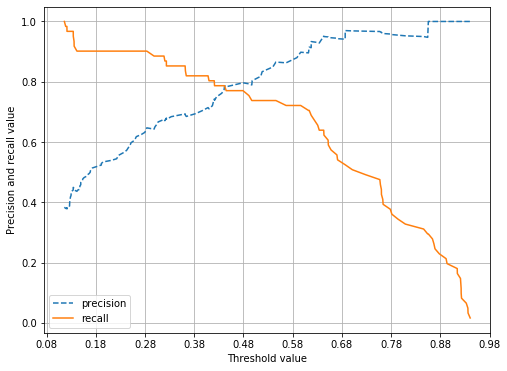

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value');
    plt.ylabel('Precision and recall value')
    
    plt.legend();
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

In [ ]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), threshold)

In [87]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index]), 2)

print('샘플 임곗값별 fpr:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 tpr:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값: [2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.] 2
샘플 임곗값별 fpr: [0.    0.008 0.025 0.042 0.11  0.169 0.22  0.347 0.61  0.746 0.831]
샘플 임곗값별 tpr: [0.    0.295 0.656 0.721 0.77  0.82  0.869 0.902 0.951 0.967 1.   ]


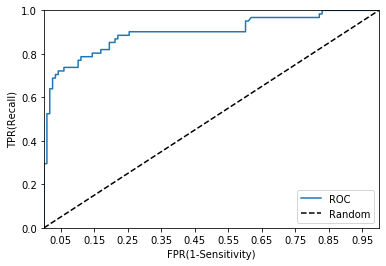

In [85]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [86]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUD 값: 0.8265
